In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
ehull_e3nn_unrelaxed_held_B_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_unrelaxed_held_B_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/holdout_set_B_sites_predictions.json")



ehull_e3nn_unrelaxed_test_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_unrelaxed_e3nn/837627/best_0/test_set_predictions.json")
ehull_CGCNN_unrelaxed_test_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_unrelaxed_CGCNN/837611/best_0/test_set_predictions.json")



ehull_e3nn_relaxed_held_B_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/holdout_set_B_sites_predictions.json")
ehull_CGCNN_relaxed_held_B_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/holdout_set_B_sites_predictions.json")



ehull_e3nn_relaxed_test_0 = pd.read_json("../../../best_models/e3nn/dft_e_hull_htvs_data_relaxed_e3nn/837628/best_0/test_set_predictions.json")
ehull_CGCNN_relaxed_test_0 = pd.read_json("../../../best_models/CGCNN/dft_e_hull_htvs_data_relaxed_CGCNN/837612/best_0/test_set_predictions.json")



In [3]:
#https://realpython.com/python-flatten-list/
import numpy as np

def flatten(matrix):
    matrix = list(matrix)
    if isinstance(matrix[0],list):
        out = [item for row in matrix for item in row]
    else:
        out = matrix
    return np.asarray(out)

In [4]:
e3nn_mean_pred_unrelaxed = flatten(ehull_e3nn_unrelaxed_held_B_0.predicted_dft_e_hull) 
e3nn_mean_pred_relaxed = flatten(ehull_e3nn_relaxed_held_B_0.predicted_dft_e_hull) 

CGCNN_mean_pred_unrelaxed = flatten(ehull_CGCNN_unrelaxed_held_B_0.predicted_dft_e_hull) 
CGCNN_mean_pred_relaxed = flatten(ehull_CGCNN_relaxed_held_B_0.predicted_dft_e_hull) 

CHGNet_data = np.load("CHGnet_ternary.npy")

In [5]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [6]:
def get_relative_vals(dataframe,vals):
    
    vals_gs = {}
    out_diffs = []
    
    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        if curr_formula in vals_gs:
            if vals[i] < vals_gs[curr_formula]:
                vals_gs[curr_formula] = vals[i]
        else:
            vals_gs[curr_formula] = vals[i]
        

    for i in range(len(dataframe)):
        curr_formula = dataframe.iloc[i].formula
        curr_val = vals[i] - vals_gs[curr_formula]
        out_diffs.append(curr_val)
        
        
    return np.asarray(out_diffs)

In [7]:
diffs_dft = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,ehull_e3nn_unrelaxed_held_B_0.dft_e_hull)

diffs_e3nn_unrelaxed = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,e3nn_mean_pred_unrelaxed)
diffs_e3nn_relaxed = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,e3nn_mean_pred_relaxed)

diffs_CGCNN_unrelaxed = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,CGCNN_mean_pred_unrelaxed)
diffs_CGCNN_relaxed = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,CGCNN_mean_pred_relaxed)

M3GNet = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,ehull_e3nn_unrelaxed_held_B_0.M3Gnet_relaxed_energy_per_atom)
CHGNet = get_relative_vals(ehull_e3nn_unrelaxed_held_B_0,CHGNet_data)/40.0


In [8]:
import matplotlib as mpl

In [9]:
print(max(diffs_dft))
print(max(diffs_e3nn_unrelaxed))
print(max(diffs_e3nn_relaxed))
print(max(diffs_CGCNN_unrelaxed))
print(max(diffs_CGCNN_relaxed))
print(max(CHGNet))
print(max(M3GNet))

0.16102584520000002
0.10823167860000002
0.1329198778
0.1178238392
0.1682125479
0.13332128524780273
0.1297927856000003


/tmp/ipykernel_149433/1418475051.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


0.014817929522666666
0.29704701370943076


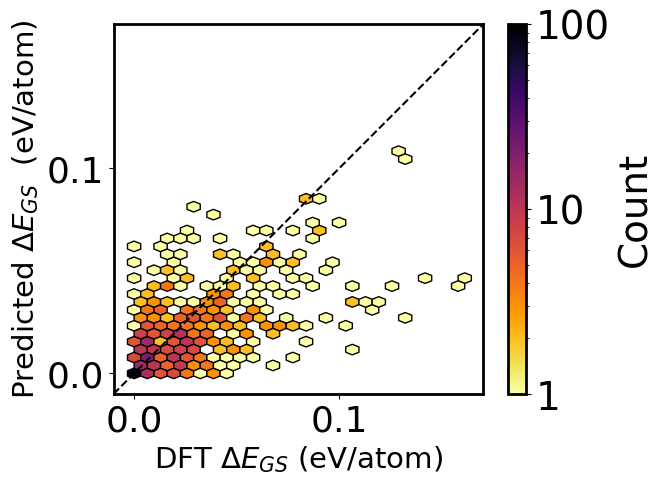

In [10]:
mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(diffs_dft,diffs_e3nn_unrelaxed,cmap=cmap,gridsize=25,mincnt=1,bins="log",edgecolor="black")

print(np.mean(np.abs(diffs_dft-diffs_e3nn_unrelaxed)))
print(metrics.r2_score(diffs_dft,diffs_e3nn_unrelaxed))


plt.plot(np.linspace(-0.01,0.17,100),np.linspace(-0.01,0.17,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.17)
plt.ylim(-0.01,0.17)


plt.xlabel("DFT $\Delta E_{GS}$ (eV/atom)",size=21)
plt.ylabel("Predicted $\Delta E_{GS}$  (eV/atom)",size=21)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
plt.clim(1,100)
cbar.set_ticks(ticks = [1,10,100],labels=[1,10,100],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("e3nn_unrelaxed_diff.pdf",bbox_inches="tight")

/tmp/ipykernel_149433/2458334059.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


0.013420953276166667
0.4600555862408694


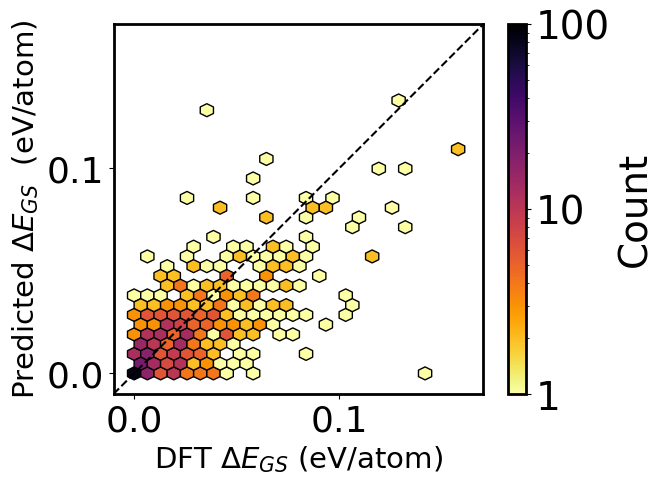

In [11]:
mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(diffs_dft,diffs_e3nn_relaxed,cmap=cmap,gridsize=25,mincnt=1,bins="log",edgecolor="black")

print(np.mean(np.abs(diffs_dft-diffs_e3nn_relaxed)))
print(metrics.r2_score(diffs_dft,diffs_e3nn_relaxed))


plt.plot(np.linspace(-0.01,0.17,100),np.linspace(-0.01,0.17,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.17)
plt.ylim(-0.01,0.17)


plt.xlabel("DFT $\Delta E_{GS}$ (eV/atom)",size=21)
plt.ylabel("Predicted $\Delta E_{GS}$  (eV/atom)",size=21)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
plt.clim(1,100)
cbar.set_ticks(ticks = [1,10,100],labels=[1,10,100],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("e3nn_relaxed_diff.pdf",bbox_inches="tight")

/tmp/ipykernel_149433/3289482795.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


0.018218892508
-0.12071377349160461


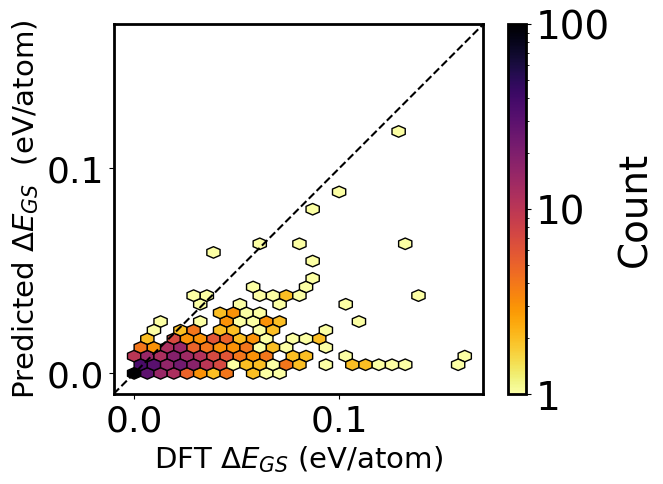

In [12]:
mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(diffs_dft,diffs_CGCNN_unrelaxed,cmap=cmap,gridsize=25,mincnt=1,bins="log",edgecolor="black")

print(np.mean(np.abs(diffs_dft-diffs_CGCNN_unrelaxed)))
print(metrics.r2_score(diffs_dft,diffs_CGCNN_unrelaxed))


plt.plot(np.linspace(-0.01,0.17,100),np.linspace(-0.01,0.17,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.17)
plt.ylim(-0.01,0.17)


plt.xlabel("DFT $\Delta E_{GS}$ (eV/atom)",size=21)
plt.ylabel("Predicted $\Delta E_{GS}$  (eV/atom)",size=21)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
plt.clim(1,100)
cbar.set_ticks(ticks = [1,10,100],labels=[1,10,100],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("CGCNN_unrelaxed_diff.pdf",bbox_inches="tight")

/tmp/ipykernel_149433/338641073.py:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  orig_map=plt.cm.get_cmap('inferno')


0.016232795197833334
0.19572327504958764


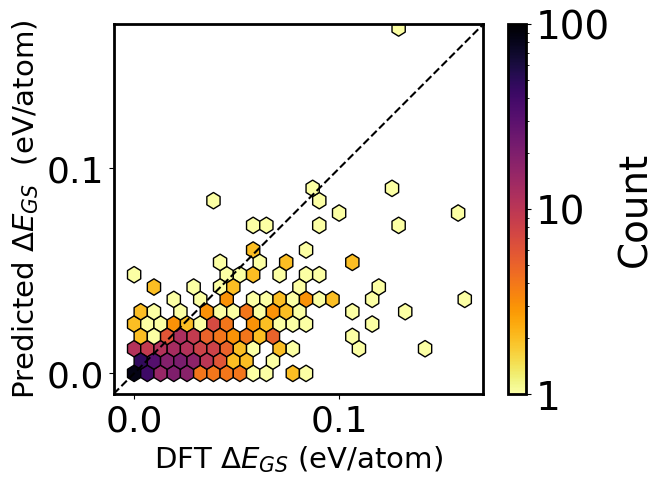

In [13]:
mpl.rcParams['axes.linewidth'] = 2.0

orig_map=plt.cm.get_cmap('inferno')

    # reversing the original colormap using reversed() function
cmap = orig_map.reversed()
im = plt.hexbin(diffs_dft,diffs_CGCNN_relaxed,cmap=cmap,gridsize=25,mincnt=1,bins="log",edgecolor="black")

print(np.mean(np.abs(diffs_dft-diffs_CGCNN_relaxed)))
print(metrics.r2_score(diffs_dft,diffs_CGCNN_relaxed))


plt.plot(np.linspace(-0.01,0.17,100),np.linspace(-0.01,0.17,100),c="black",linestyle="--")
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')

plt.xlim(-0.01,0.17)
plt.ylim(-0.01,0.17)


plt.xlabel("DFT $\Delta E_{GS}$ (eV/atom)",size=21)
plt.ylabel("Predicted $\Delta E_{GS}$  (eV/atom)",size=21)
plt.xticks([0.0,0.1],size=26)
plt.yticks([0.0,0.1],size=26)
#im.figure.axes[0].tick_params(axis="both", labelsize=15)

cbar = plt.colorbar()
plt.clim(1,100)
cbar.set_ticks(ticks = [1,10,100],labels=[1,10,100],fontsize=28)
cbar.set_label(label="Count",size=28)
plt.savefig("CGCNN_relaxed_diff.pdf",bbox_inches="tight")